## The purpose of the script is testing, no confidential data envolved


### # 1. Import package

In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


### # 2. Import data sets and separate training set and test set

In [2]:

iris = datasets.load_iris()
digits = datasets.load_digits()
wine_dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine = np.genfromtxt(wine_dataset_url, delimiter=';',skip_header=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(iris.data,iris.target,
                                                        test_size=0.2, 
                                                        random_state=123, 
                                                        stratify=iris.target)

X2_train, X2_test, y2_train, y2_test = train_test_split(digits.data,digits.target,
                                                        test_size=0.2, 
                                                        random_state=123, 
                                                        stratify=digits.target)

X3, y3 = wine[:,:-1],wine[:,-1]
X3_train, X3_test, y3_train, y3_test = train_test_split(wine[:,:-1], wine[:,-1],
                                                        test_size=0.2, 
                                                        random_state=123, 
                                                        stratify= wine[:,-1])


print('iris training data has ',np.shape(X1_train)[0], ' samples and ',
      np.shape(X1_train)[1], ' features')
print('.... result should look like this... \n', y1_train, '\n')

print('>>>\n>>>\n')

print('digits training data has ',np.shape(X2_train)[0], ' samples and ',
      np.shape(X2_train)[1], ' features')
print('.... result should look like this... \n', y2_train, '\n')

print('>>>\n>>>\n')


print('wine training data has ',np.shape(X3_train)[0], ' samples and ',
      np.shape(X3_train)[1], ' features')
print('.... result should look like this... \n', y3_train, '\n')


iris training data has  120  samples and  4  features
.... result should look like this... 
 [1 0 1 0 0 2 0 0 2 1 0 0 0 2 0 2 0 2 1 0 0 1 2 2 1 1 0 2 1 2 1 2 2 1 0 2 2
 1 2 1 0 0 2 2 2 2 0 1 0 0 1 2 2 1 1 0 2 2 0 1 0 1 1 0 0 0 1 2 0 2 1 1 2 2
 0 2 0 1 1 2 2 0 1 0 0 1 1 2 1 1 2 2 2 0 1 1 1 0 0 1 2 1 2 2 0 0 2 1 2 1 1
 1 0 1 0 0 2 2 0 1] 

>>>
>>>

digits training data has  1437  samples and  64  features
.... result should look like this... 
 [3 2 2 ... 5 1 5] 

>>>
>>>

wine training data has  1279  samples and  11  features
.... result should look like this... 
 [5. 7. 6. ... 6. 6. 6.] 



### # 3. Declare data preprocessing steps
    I am setting up to algorithm here, one is Random Forest Regression, the other one is neural network for classification.

In [4]:
# we need all the processor to start working
pipeline_RF = make_pipeline(preprocessing.StandardScaler(), 
                             RandomForestRegressor(n_estimators=100,n_jobs=-1)) 



pipeline_NN = make_pipeline(preprocessing.StandardScaler(),
                             MLPClassifier(max_iter=500,solver='lbfgs', 
                                           alpha=1e-5,
                                           hidden_layer_sizes=(5, 2), 
                                           random_state=1))

### # 4. Declare hyperparameters to tune
    Does NN-layer need hyperparameters?

In [5]:
hyperparameters_RF = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

hyperparameters_NN = [{'mlpclassifier__hidden_layer_sizes': [(5,5,5), (5,10,5), (10)],
#                       'mlpclassifier__activation' : [‘identity’, ‘logistic’, ‘tanh’, ‘relu’],
#                       'mlpclassifier__solver': ['sgd', 'adam'],
#                       'mlpclassifier__alpha': [0.0001, 0.05],
                      'mlpclassifier__learning_rate': ['constant','adaptive']}]

### # 5.Tune model using cross-validation pipeline

In [6]:
clf_RF = GridSearchCV(pipeline_RF, hyperparameters_RF, cv=10)


# clf_RF.fit(X1_train, y1_train)


In [15]:
clf_NN = GridSearchCV(pipeline_NN, hyperparameters_NN, cv=5)


# clf_NN.fit(X3_train, y3_train)


### # 6. Evaluate model pipeline on test data

In [13]:
pred = clf_RF.predict(X1_test)
print(pred-y1_test)
print(pred)

# pred = clf_NN.predict(X1_test)
# prob_est = clf_NN.predict_proba(X1_test)
# print(prob_est)


[ 0.01782458  0.00863636 -0.01448808 -0.02851361  0.00863636  0.
 -0.00301081  0.37374388 -0.40906423  0.          0.          0.94185652
 -0.09918731  0.05319917 -0.01448808  0.18262909  0.          0.
  0.          0.01888889  0.         -0.00897906 -0.165471    0.22868205
 -0.00301081 -0.05870514  0.03420399  0.08744556  0.06791715  0.04358048]
[1.01782458 0.00863636 1.98551192 1.97148639 0.00863636 0.
 1.99698919 1.37374388 1.59093577 0.         0.         1.94185652
 1.90081269 1.05319917 1.98551192 1.18262909 0.         0.
 0.         0.01888889 0.         1.99102094 1.834529   1.22868205
 1.99698919 1.94129486 1.03420399 1.08744556 1.06791715 1.04358048]


### # 7. Check the learning curve

In [26]:
train_sizes, train_scores, test_scores = learning_curve(pipeline_NN, 
                                                        X3, y3, 
                                                        n_jobs= None,   # always remember to parallel
                                                        train_sizes=[0.2,0.4, 0.6,0.8,1 ] , cv=5
                                                        )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

### # 8. Plot the learning curve

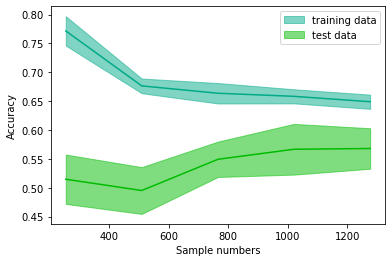

In [28]:
cmap = cm.get_cmap('nipy_spectral')
fill1 = list(cmap(0.4))
fill1[-1] = 0.5
fill1 = tuple(fill1)

fill2 = list(cmap(0.5))
fill2[-1] = 0.5
fill2 = tuple(fill2)

plt.figure(1)
plt.plot(train_sizes,train_scores_mean,color=cmap(0.4))
plt.fill_between(train_sizes,train_scores_mean - train_scores_std,train_scores_mean + train_scores_std,
                color = fill1,
                label = 'training data')

plt.plot(train_sizes,test_scores_mean,color=cmap(0.5))
plt.fill_between(train_sizes,test_scores_mean - test_scores_std,test_scores_mean + test_scores_std,
                color = fill2, 
                label = 'test data')

plt.xlabel('Sample numbers')
plt.ylabel('Accuracy')
plt.legend()

### # 10. Save model for future use

In [ ]:
joblib.dump(clf_RF, 'rf_regressor.pkl')
joblib.dump(clf_NN, 'rf_regressor.pkl')